This project explores a dataset of used cars collected from Cars24, an online resale platform. The data contains details such as year of manufacture, car model, fuel type, transmission, ownership history, kilometers driven, location, and the resale price in lakhs. My main goal is to understand what factors drive the resale value of cars and My target variable is Price. 

***Import Libraries***

In [2]:
# Importing Libraries I began by importing the core Python libraries required for data preprocessing, analysis, and visualization. 

import pandas as pd # Data manipulation and analysis.
import numpy as np # Numerical operations and array handling.
import matplotlib.pyplot as plt # More control, lower-level, basic plotting.
import seaborn as sns
from scipy import stats # Statistical functions and tests.

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output.
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output.

***Download Database***

In [3]:
# Load data from CSV file 
# this reads the database into a pandas DataFrame which will serve as foundation for all subsequent analysis and modeling tasks. 
df=pd.read_csv('data/Cars24.csv')

***Get Information about Database***

In [4]:
# Display the first 5 rows of the dataset
# This gives a quick preview of the data's structure, including column names, data types, and sample values.
# It helps confirm whether the dataset was loaded correctly and if the expected columns are present.
df.head(10)



,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
0,2015,Maruti Swift,ZDI,60660,Diesel,Manual,1st owner,2.79,Suryamani Nagar Agartala Tripura
1,2019,Maruti Swift Dzire,TOUR S PETROL,150000,Petrol,Manual,2nd owner,3.57,Jogendra Nagar Agartala
2,2021,Mahindra XUV500,W11,48700,Diesel,Manual,2nd owner,11.63,Ram Nagar Agartala Tripura
3,2015,Maruti OMNI E,8 STR,55800,Petrol,Manual,3rd owner,1.46,Dhaleswar Agartala Tripura
4,2010,Volkswagen Vento,HIGHLINE 1.6 MPI,49320,Petrol,Manual,1st owner,1.79,Badharghat Agartala
5,2016,Maruti Omni,5 STR,99790,Petrol,Manual,1st owner,1.65,Pratapgarh Agartala Tripura
6,2013,Maruti OMNI E,STD,86550,Petrol,Manual,1st owner,1.50,Dhaleswar Agartala
7,2017,Tata Hexa,XE 4X2 7 STR,150000,Diesel,Manual,1st owner,4.77,Nutan Nagar Agartala
8,2020,Hyundai Creta,SX 1.5 PETROL,47760,Petrol,Manual,1st owner,9.87,Vivekananda Nagar Ambassa
9,2024,Tata PUNCH EV,ADVENTURE 3.3,15570,Electric,Auto,1st owner,10.50,Agartala Radhakishorenagar Tripura


In [5]:
#Return number of rows and columns in the DataFrame
df.shape

(9176, 9)

In [6]:
#Return information about the DataFrame, Including data types and non-null counts.
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9176 entries, 0 to 9175
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               9176 non-null   int64  
 1   Car Model          9176 non-null   object 
 2   Car Variant        9176 non-null   object 
 3   KM Driven          9176 non-null   int64  
 4   Fuel Type          9176 non-null   object 
 5   Transmission Type  9176 non-null   object 
 6   Ownership          9176 non-null   object 
 7   Price(in Lakhs)    9175 non-null   float64
 8   Location           9173 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 645.3+ KB


The dataset contains 9176 rows and 9 columns.There is a mix of data types:

Numerical: Year, KM Driven, Price(in Lakhs)

Categorical (object type): Car Model, Car Variant, Fuel Type, Transmission Type, Ownership, Location

Categorical columns will require encoding if I intend to use them later in predictive modeling. Only a few missing values exist—1 in Price and 3 in Location—which will need to be handled. Next step would be handle missing values appropriately, Check for outliers in numerical features such as KM Driven and Price(in Lakhs).

In [7]:
# Return summary statistics for numerical columns in the DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,9176.0,2017.147777,3.992440,2001.0,2014.0,2017.00,2021.00,2025.0
KM Driven,9176.0,89533.652354,395485.704208,1.0,44735.0,75680.00,110000.00,37270000.0
Price(in Lakhs),9175.0,6.105006,5.334563,0.3,2.7,4.61,7.59,67.0


The summary statistics show that car manufacturing years range from 2001 to 2025, with a median of 2017.  
The 'KM Driven' column has a median of 75,680 km, but the maximum value (37 million km) suggests extreme outliers.   
Car prices are mostly between 0.3 and 67 lakhs. The mean (6.1) is higher than the median (4.6), which shows that a few expensive cars are pulling the average up.


***Handle Duplicates*** 

In this dataset, each row represents a car listing. My focus in handling duplicates is to verify that there are no fully duplicated rows where all features (Model, Variant, Year, KM Driven, Fuel Type, Transmission, Ownership, Location, and Price) are identical.

Duplicate values within individual features are expected. For example, categorical columns such as Fuel Type, Transmission Type, and Ownership will naturally repeat, since many cars share the same characteristics. These are not considered problematic duplicates.


In [8]:
# Show columns of dataset
df.columns

Index(['Year', 'Car Model', 'Car Variant', 'KM Driven', 'Fuel Type',
       'Transmission Type', 'Ownership', 'Price(in Lakhs)', 'Location'],
      dtype='object')

In [9]:
# Check for any rows that are completely duplicated across all columns
#full duplicate check 
duplicate_rows = df.duplicated().sum()
print(f"Number of fully identical rows: {duplicate_rows}")


Number of fully identical rows: 337


***In my dataset, I found 337 fully identical rows, which I dropped to ensure that each car listing is unique.*** 

Next, I reviewed the dataset for any irrelevant data. Irrelevant features are those that do not contribute meaningfully to the analysis or prediction task. For example, in a car sales dataset, this could include seller contact details if present. In my case, since the dataset mainly contains relevant car attributes, most columns are retained at this stage.
I also examined duplicates on a subset ('Car Model', 'Location') and found 1567 cases; these reflect legitimate listings that differ in other attributes (e.g., year, mileage, price), so they were retained. This approach removes only true duplicates, prevents bias/leakage, and preserves genuine variation in the data.you can see this in my other file where i was following tutorial work.




In [10]:
#drop duplicates 
df = df.drop_duplicates().reset_index(drop=True) 

In [11]:
#Verify the database again
print(f"After dropping, shape of dataset: {df.shape}")

After dropping, shape of dataset: (8839, 9)


In [12]:
#check the duplicates again
print(f"duplicates:{df.duplicated().sum()}")

duplicates:0


After running 'drop_duplicates()', the dataset shape reduced from (9176, 9) to (8839, 9).  
A follow-up duplicate check confirmed that there are now 0 duplicate rows remaining.  
This ensures each record represents a unique car listing.


***Handle Irrelavant Data***  
I checked the dataset for irrelevant data. This included searching for ID-like columns (which serve only as identifiers) and constant features (columns with the same value for all rows).  
In this dataset, all columns represent meaningful attributes of cars (year, model, mileage, fuel, transmission, ownership, location, and price).  
The check for constant features returned an empty list, confirming that no irrelevant data needed to be removed.



In [13]:
# Check for any constant features (columns with only one unique value like all rows= petrol)
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Constant features:", constant_features)


Constant features: []


***Handle Missing Values*** 

In [14]:
# Display the DataFrame having missing data.
df_missing_data = df[df.isnull().any(axis=1)]
df_missing_data.shape

(4, 9)

In [15]:
df_missing_data.tail()

,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
413,2018,Hyundai i20 Active,1.2 S,87770,Petrol,Manual,2nd owner,4.25,NaN
4443,2013,Hyundai i20,SPORTZ 1.4 CRDI,140000,Diesel,Manual,3rd owner,2.24,NaN
5591,2021,KIA SONET,GTX PLUS 1.5 AT,61640,Diesel,Auto,1st owner,10.35,NaN
8242,2024,BMW 7 Series,740i M Sport,12360,Petrol,Auto,1st owner,NaN,"Ashok Vihar Rd, Block C, Phase 2, New Delhi"


In [16]:
# Show columns with mostly values more that x% missing values
threshold = 5
print(f"Total records {df.shape[0]}")
print("*"* 10)
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_ratio = (missing_count / df.shape[0]) * 100
    if missing_ratio > threshold:
        print(f"Column: {col} has {missing_count} missing values ({missing_ratio: 2f}%)")
        print("*"* 10)

Total records 8839
**********


printing missing values in database 

In [17]:
print(df.isnull().sum())


Year                 0
Car Model            0
Car Variant          0
KM Driven            0
Fuel Type            0
Transmission Type    0
Ownership            0
Price(in Lakhs)      1
Location             3
dtype: int64


In [18]:
# Drop rows with missing values
df_dropna = df.dropna()
print("Dropped rows with missing values. Shape after drop:", df_dropna.shape)

#Impute missing values
df_impute = df.copy()

# Impute Price(in Lakhs) with median
df_impute['Price(in Lakhs)'] = df_impute['Price(in Lakhs)'].fillna(df_impute['Price(in Lakhs)'].median())
print("Imputed 'Price(in Lakhs)' with the median value.")

# Impute Location with mode (most frequent city)
df_impute['Location'] = df_impute['Location'].fillna(df_impute['Location'].mode()[0])
print("Imputed 'Location' with the mode (most common city).")

# Check nulls after imputation
print("\nMissing values count after imputation:")
print(df_impute[['Price(in Lakhs)', 'Location']].isnull().sum())


Dropped rows with missing values. Shape after drop: (8835, 9)
Imputed 'Price(in Lakhs)' with the median value.
Imputed 'Location' with the mode (most common city).

Missing values count after imputation:
Price(in Lakhs)    0
Location           0
dtype: int64


I demonstrated both dropping and imputing missing values. Dropping rows is the simplest approach and can be suitable when only a very small number of records are affected. However, this reduces the dataset size. Imputation is usually preferred because it retains all records while handling the missing data logically.  

In my dataset, there were only 4 missing values (1 in 'Price(in Lakhs)' and 3 in 'Location'). Either method was valid, but I chose to continue with imputation. I filled the missing  Price(in Lakhs)  with the median value (to avoid distortion from outliers) and the missing 'Location' with the mode (the most frequent city).


Handeling Outliners

When checking for outliers in my dataset, I decided to use the Interquartile Range (IQR) method. 
IQR method uses the 25th percentile (Q1), 75th percentile (Q3), and the median to define the spread of the data. In short, IQR provides a more stable way to flag unusually expensive luxury cars or very high-mileage vehicles in this dataset.

In [19]:
#Grab outliers because outliers are the extreme value or significantly 
#different from other values in the dataset. In regression analysis, outliers can lead to inaccurate and unreliable prediction results. 
# create function to caculate a column name, and returns the lower and upper outlier boundaries based on the IQR method
# IQR (Interquartile Range): 
#Lower bound = Q1-1.5*IQR
#Upper bound = Q!+1.5*IQR 
#Any value outside these bounds is considered an outliner

def find_outliers_IQR_method(input_df, variable):
    IQR = input_df[variable].quantile(0.75) - input_df[variable].quantile(0.25)

    lower_limit = input_df[variable].quantile(0.25) - (IQR * 1.5)
    upper_limit = input_df[variable].quantile(0.75) + (IQR * 1.5)

    return lower_limit, upper_limit



In [20]:
#Find lower and upper limit for 
feature = 'KM Driven'
lower, upper = find_outliers_IQR_method(df, feature)
lower, upper

(np.float64(-50637.5), np.float64(206382.5))

In [21]:
feature = "Price(in Lakhs)"
lower,upper = find_outliers_IQR_method(df,feature)
lower,upper

(np.float64(-4.695), np.float64(14.945))

***insight***
When applying the IQR method, both 'KM Driven' and 'Price(in Lakhs)' outliner were detected. 
For 'KM Driven', the practical bounds was 207,897 km. Cars with mileage above this range were flagged as potential outliers.  
For 'Price(in Lakhs)', the practical bounds was 14.9 lakhs. Cars priced above this threshold were considered unusually high for second hand car.  
Negetive lower bounds are meaningless for the database. 
***Decision***
I will try both mathods next Removing Outliners (can be ideal for big databases) and Capping them 
High outliers in this dataset (very expensive luxury cars or vehicles with extremely high mileage) are not data errors but genuine cases in the second-hand market. Deleting them would remove important information about the upper extremes of resale values.

Instead, I chose capping: values above the IQR upper bound are replaced with the bound, while negative lower bounds are ignored since the minimum realistic value is zero. This approach keeps the fact that a car was unusually expensive or heavily used, but prevents these few records from disproportionately skewing the analysis and models.
                                                    


In [22]:
#Remove outliers 
df_cleaned = df[(df[feature] > lower)&(df[feature] < upper)]

print(f'Cleaned dataset : {df_cleaned.shape}')
print(f'Outliers count : {len(df)-len(df_cleaned)}')


Cleaned dataset : (8290, 9)
Outliers count : 549


Initially I tried ***removing outliers***, but since extreme values are genuine (luxury/high mileage cars), I switched to capping, which limits their statistical leverage without deleting real cases.I will run IQR method again. 

In [23]:
def find_outliers_IQR_method(input_df, variable):
    IQR = input_df[variable].quantile(0.75) - input_df[variable].quantile(0.25)

    lower_limit = input_df[variable].quantile(0.25) - (IQR * 1.5)
    upper_limit = input_df[variable].quantile(0.75) + (IQR * 1.5)

    return lower_limit, upper_limit


# Make a copy of original database, I learnt a lesson earlier and don't want to play around with original again
df_capped = df.copy()

# Columns to cap
cols_to_cap = ['KM Driven', 'Price(in Lakhs)']

for col in cols_to_cap:
    lower, upper = find_outliers_IQR_method(df_capped, col)   # ✅ fixed
    # Cap values outside the bounds
    df_capped[col] = df_capped[col].clip(lower=lower, upper=upper)

    print(f"\nColumn: {col}")
    print(f" - Lower limit: {lower:.2f}")
    print(f" - Upper limit: {upper:.2f}")
    print(f" - Min after capping: {df_capped[col].min():.2f}")
    print(f" - Max after capping: {df_capped[col].max():.2f}")




Column: KM Driven
 - Lower limit: -50637.50
 - Upper limit: 206382.50
 - Min after capping: 1.00
 - Max after capping: 206382.50

Column: Price(in Lakhs)
 - Lower limit: -4.70
 - Upper limit: 14.95
 - Min after capping: 0.30
 - Max after capping: 14.95


*** Probability plots before and after handling outliner ***


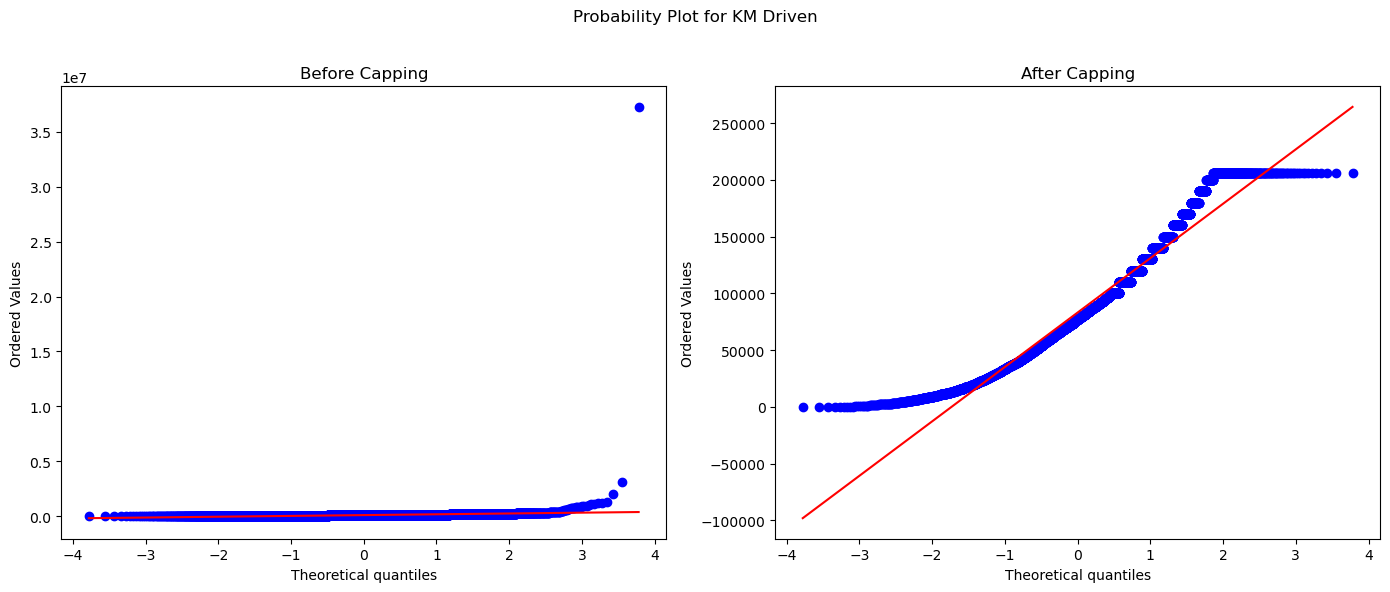

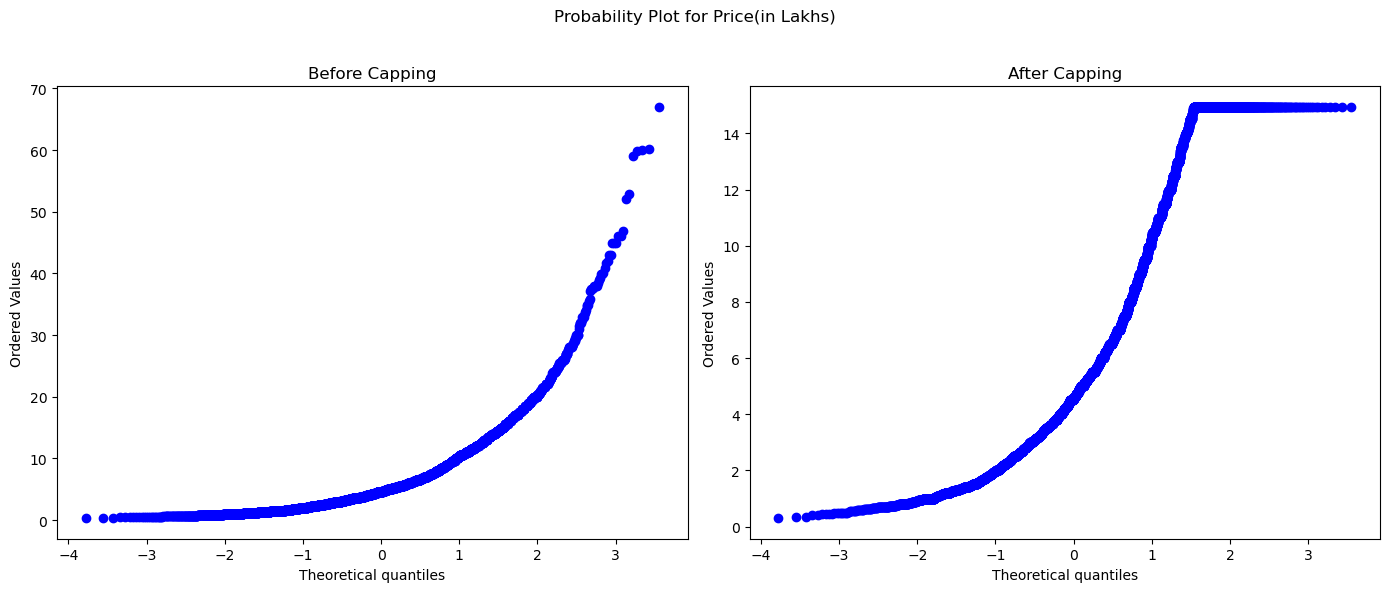

In [24]:
#list of columns to visualize
cols_to_visualize = ['KM Driven', 'Price(in Lakhs)']
for feature in ['KM Driven', 'Price(in Lakhs)']:
    plt.figure(figsize=(14,6))
    plt.suptitle(f'Probability Plot for {feature}')

    # BEFORE
    plt.subplot(1,2,1)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.title('Before Capping')

    # AFTER 
    plt.subplot(1,2,2)
    stats.probplot(df_capped[feature], dist="norm", plot=plt)
    plt.title('After Capping')

    plt.tight_layout(rect=[0,0,1,0.96])
    plt.show()


***Insight***
-Red line is the “perfect normal” line. if the data were normal, points would fall on this line.  
- Points close to the line showing data is roughly normal in that range.  
- Curved pattern showing skewness:  
- In my case Price and KM Driven both show right skew; after capping. It means the extreme outliers are reduced and the plot looks closer to normal.  
The flat line at the top of the Pric shows all extreme high values 
(luxury cars priced above 14.9 lakhs) were capped to the same value. 
This means multiple records now share the same maximum price, which shows up as a flat section in the plot. 
It confirms capping worked as intended by limiting outlier influence, but it also removes variation beyond the cap.



***Exploratory Data Analysis (EDA)***

For this project, my EDA is aimed at understanding the characteristics of second-hand cars and the factors that influence their resale prices.
The idea is to look beyond raw numbers. Since the end goal is to build predictive models for car prices, the EDA helps me validate assumptions and shape expectations.

From this perspective, i will be looking into:
- How do mileage, year of manufacture, and ownership history impact resale value?
- How strongly are the numerical features (Year, KM Driven, Price) correlated, and what does this imply about depreciation trends?
- Which types of vehicles (fuel, transmission) are priced higher or lower?
- Do certain car models or brands dominate the resale market.
***My EDA will show**
What the dataset looks like - categorical distributions (Fuel, Transmission, Ownership, Model).
How the numbers behave- histograms of Price, KM, Year/Car Age (skewness, outliers).
What drives the target (Price) - boxplots, scatterplots, and correlations to show relationships.


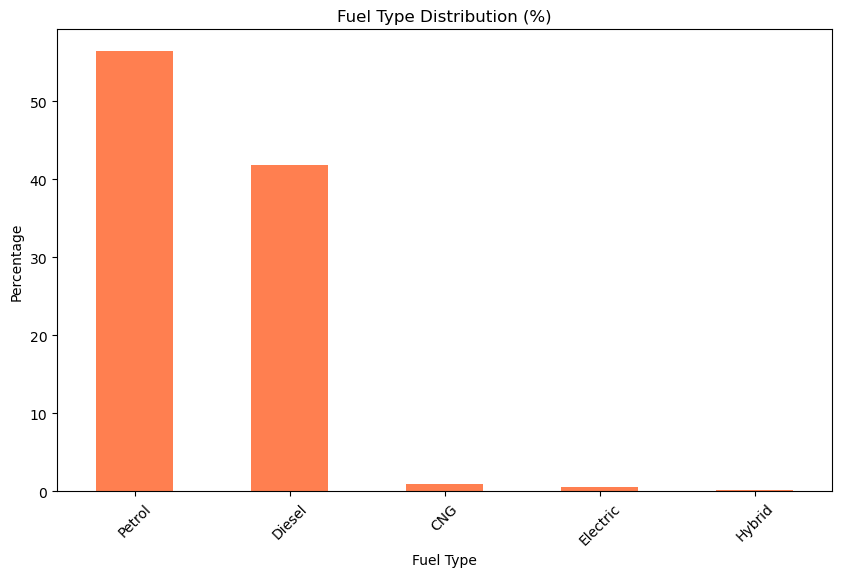

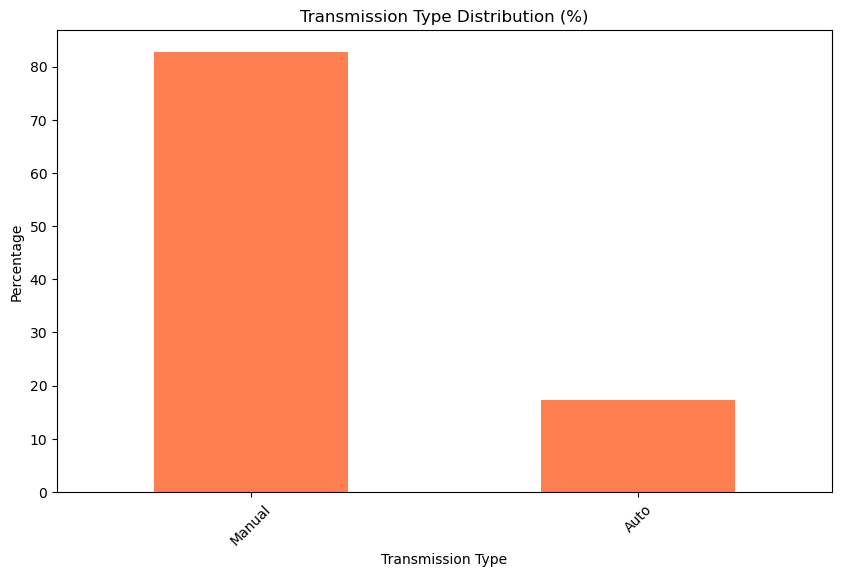

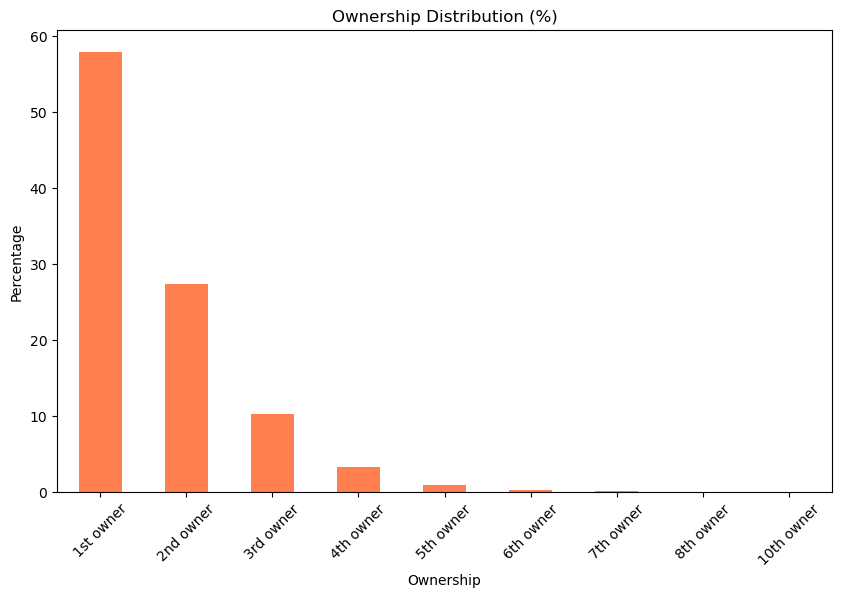

In [25]:
#How database looks like categorial distributions 
categorical_cols=['Fuel Type', 'Transmission Type', 'Ownership']
for col in categorical_cols:
    plt.figure(figsize=(10,6))
    (df[col].value_counts(normalize=True) * 100).plot(kind='bar', color='coral')
    plt.title(f"{col} Distribution (%)")
    plt.ylabel("Percentage")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

Starting with EDA, I decided to look at percentage distributions of the categorical features like fuel type, transmission, ownership and car model. The reason for starting here is that it quickly tells me what my dataset is made up of. If I see that most cars are petrol, manual and first-owner, then I already understand the general trend before I even look at prices. This step is more about understanding the composition of the data rather than finding patterns yet.

***Observation***
My car Model and Location bar chart Look too massy because there are too many unique values in my database. Every new model, new Location getsa bar, so the x-axis becomes unreadable with overlapping labels. To fix this i will use fix number e.g. , top 10. 

The percentage distribution of car models shows that the dataset is dominated by popular mass-market cars. The Maruti Swift leads at just over 3%, followed closely by the Maruti Wagon R, Hyundai Creta, and Swift Dzire, each contributing around 2.5–2.9%. Other frequently listed models include the Maruti Baleno, Honda City, Hyundai Grand i10, Tata Nexon, Hyundai i10, and Hyundai Verna.

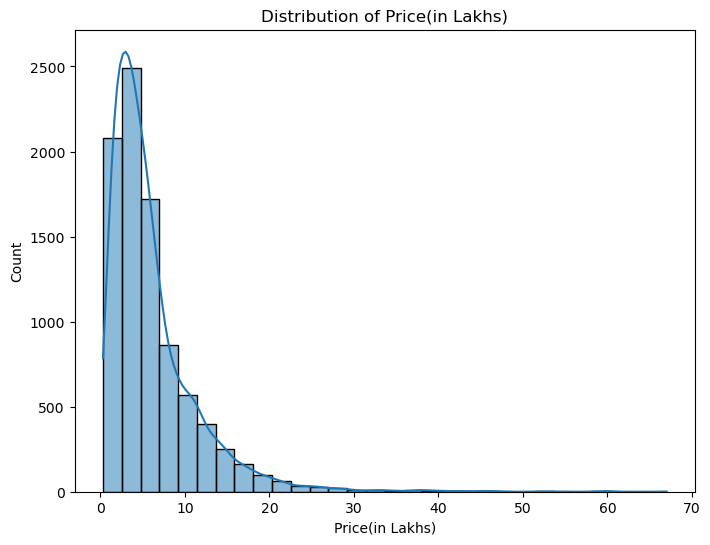

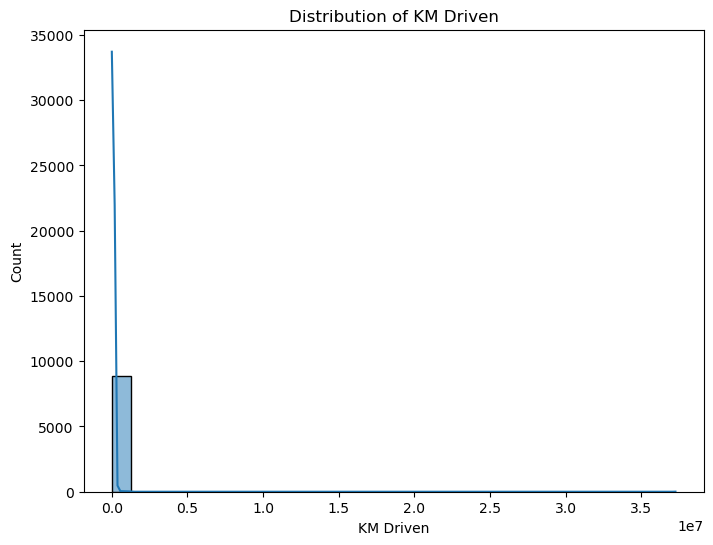

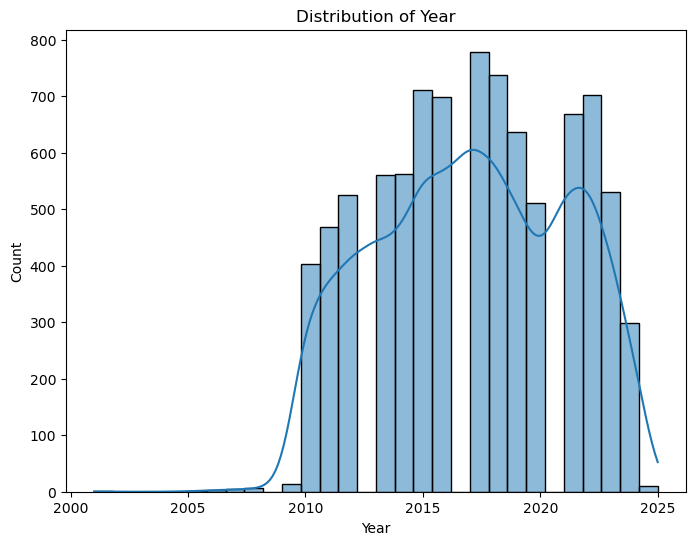

In [26]:
#How the numbers behaves: Numeric Hisogram  
numeric_cols = ['Price(in Lakhs)', 'KM Driven', 'Year']

for col in numeric_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()



***Insight***
The resale price distribution is strongly positive-skewed, with most cars priced below 10 lakhs. A long tail extends up to luxury vehicles above 50 lakhs. The majority of the market represented here is budget to mid-range cars.The high-end models are form outliers.

The distribution of kilometers driven is highly positive-skewed. Most cars fall below 100,000 km, which is typical usage for resale cars, but there are extreme outliers with mileage above 200,000 km (and even unrealistic values in the millions). These extreme points stretch the scale and highlight the need for outlier handling.

The majority of vehicles were manufactured between 2012 and 2022, with strong peaks after 2015. Very few cars appear before 2010. This aligns with the Car Age pattern, confirming that most listed vehicles are relatively recent years.

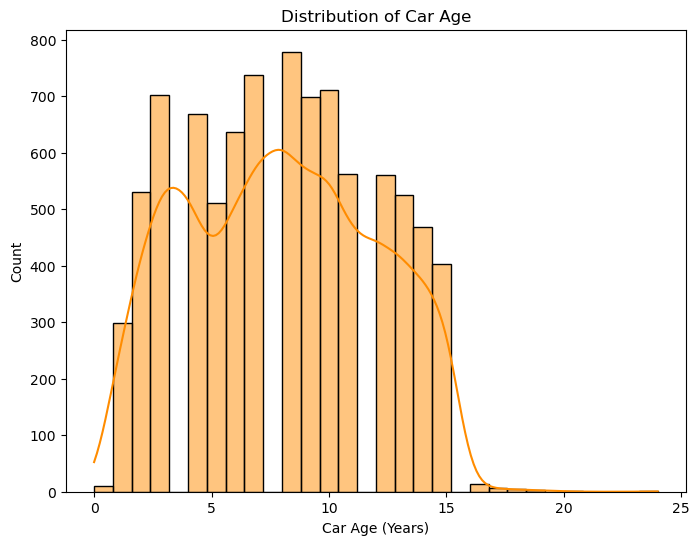

In [27]:
#Car Age for easier interpretation
df['Car Age'] = 2025 - df['Year']

plt.figure(figsize=(8,6))
sns.histplot(df['Car Age'].dropna(), bins=30, kde=True, color="darkorange")
plt.title("Distribution of Car Age")
plt.xlabel("Car Age (Years)")
plt.ylabel("Count")
plt.show()


***Insight***
Most cars in the dataset are under 10 years old, with a peak around 5–8 years. Very few cars are older than 15 years. This makes sense because buyers tend to avoid very old cars, and newer vehicles dominate the second-hand market. The distribution is positive-skewed, showing more younger cars and fewer older ones.

***What drives the Target variable, care resale price ***
this is the Heart of my EDA because it shows which factor affects resale value.I am going to understand the Target variable, car resale price.To do this I loked into boxplot, scatterplots and correlations. Boxplots helped me compare prices across different categories such as fuel type, transmission and ownership so I can see if one group generally sells for more than another. Scatterplots are useful for continuous variables like year and kilometers driven because they let me check if newer cars are really more expensive and whether high mileage reduces value. Finally, correlations give me a simple numerical summary of how strongly price is related to the other numeric features, which helps confirm the patterns I see in the graphs.in

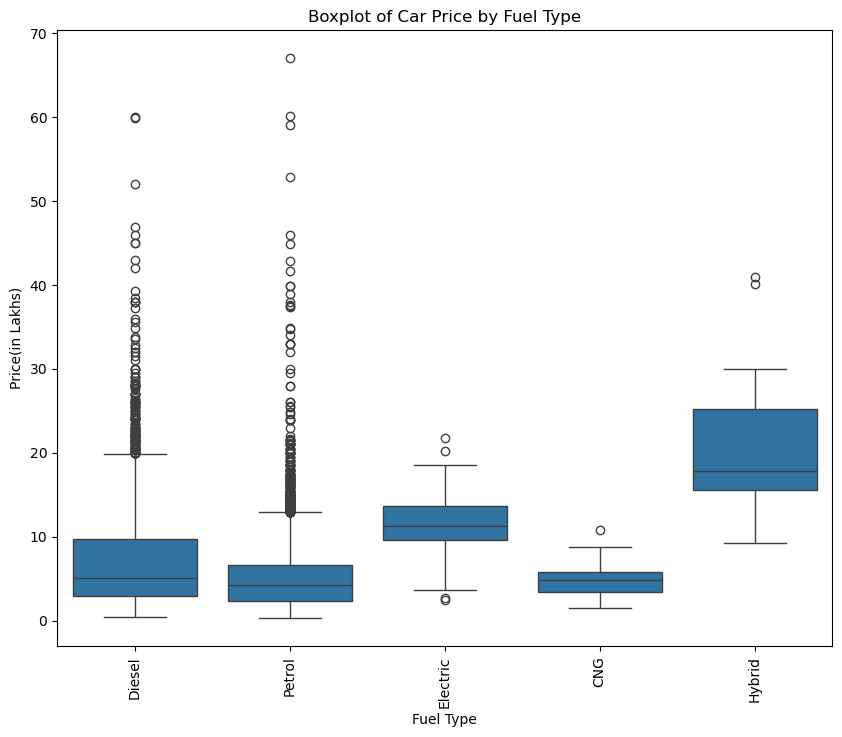

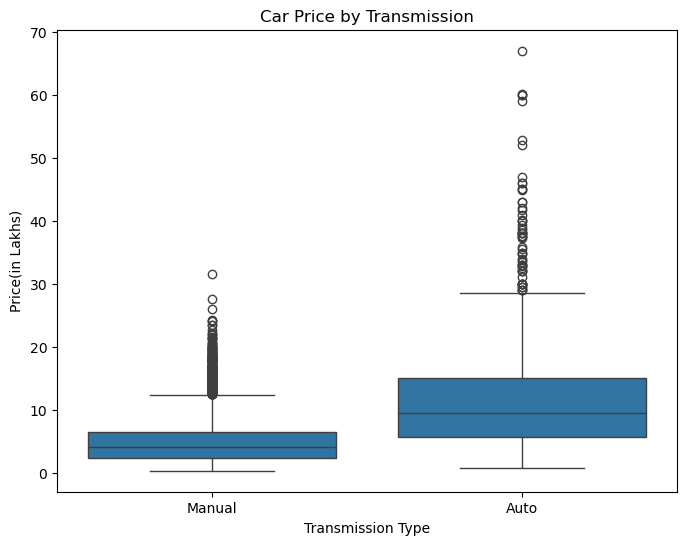

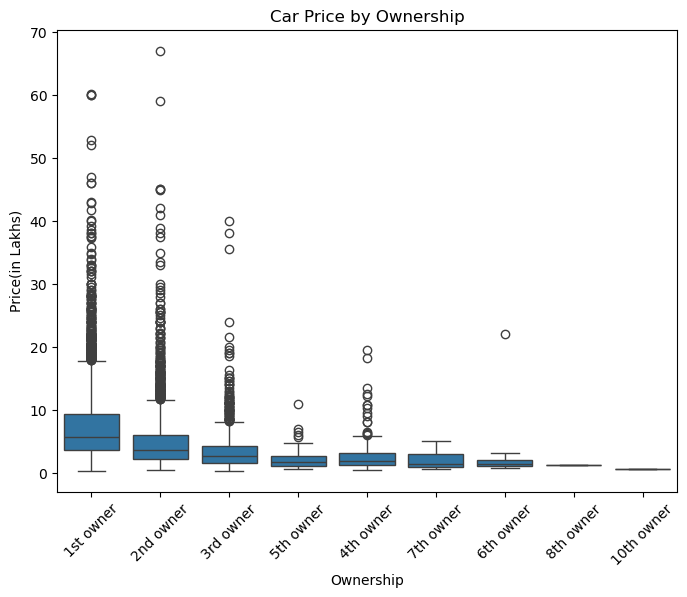

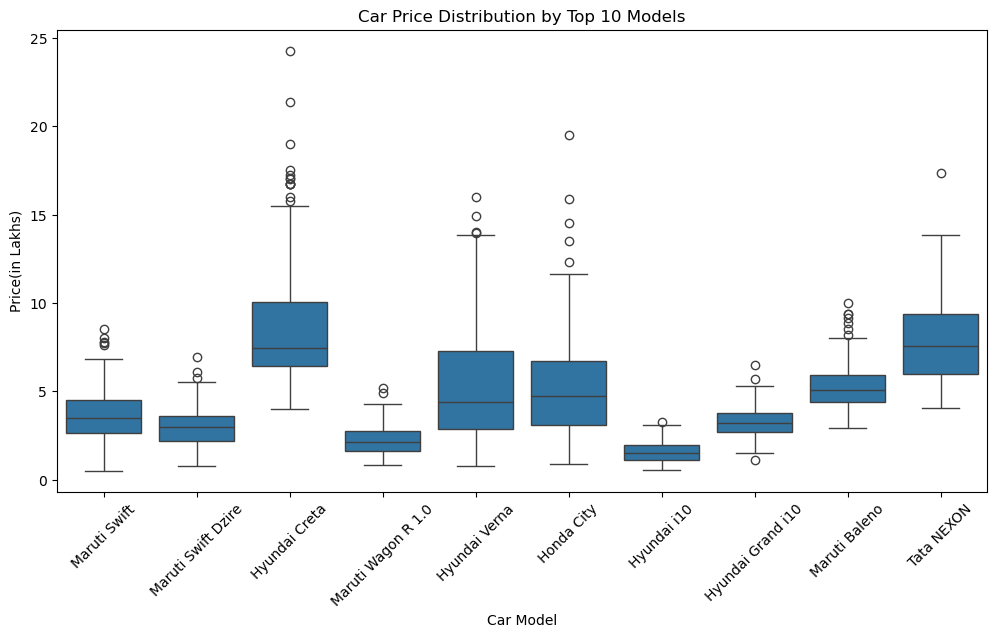

In [28]:
#break things down by categories (fuel, transmission, ownership, model) and compare price within each group.
plt.figure(figsize=(10, 8))
plot = sns.boxplot(x='Fuel Type', y='Price(in Lakhs)', data=df)
plot.set_title('Boxplot of Car Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price(in Lakhs)')
plt.xticks(rotation=90)
plt.show()

#Price vs Transmission
plt.figure(figsize=(8,6))
plot= sns.boxplot(x='Transmission Type', y='Price(in Lakhs)', data=df)
plot= plt.title("Car Price by Transmission")
plt.show()

# Price vs Ownership
plt.figure(figsize=(8,6))
plot= sns.boxplot(x='Ownership', y='Price(in Lakhs)', data=df)
plt.xticks(rotation=45)
plot= plt.title("Car Price by Ownership")
plt.show()

# Price vs Top 10 Car Models
top_models = df['Car Model'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='Car Model', y='Price(in Lakhs)', data=df[df['Car Model'].isin(top_models)])
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Top 10 Models")
plt.show()

***Insight***
When I looked at the boxplot of fuel type, it was clear that hybrids and electric cars sit much higher on the price scale compared to petrol or diesel. Petrol and diesel have lower medians but I noticed so many outliers shooting up.These are probably the premium or luxury brands that run on petrol or diesel. CNG is different; the prices are more tightly packed with hardly any big outliers.

For transmission, the story was very clear. Automatic cars not only had a higher median price but also a much wider spread. The tall whiskers and the many outliers show that autos cover everything from mid-range to luxury. Manuals, on the other hand, are more tightly grouped at the bottom, with just a few outliers going up past 10 lakhs.

The ownership boxplot was the most striking. First-owner cars obviously fetch the most money and they also had those high outliers sitting way above the rest. By the time you get to a second or third owner, the median drops and the outliers reduce too. Once it gets to fourth owner and beyond, the prices just collapse,hardly any outliers left.

Finally, when I checked the top 10 models, I could see some models clearly holding their value better. Hyundai Creta and Tata Nexon stand out, with higher medians and strong outliers. Honda City and Verna also show a wide spread with luxury cars pulling the outliers upwards. Meanwhile, Swift and Swift Dzire are at the lower end, clustered tightly with only small outliers, showing they don’t stretch into high resale values.

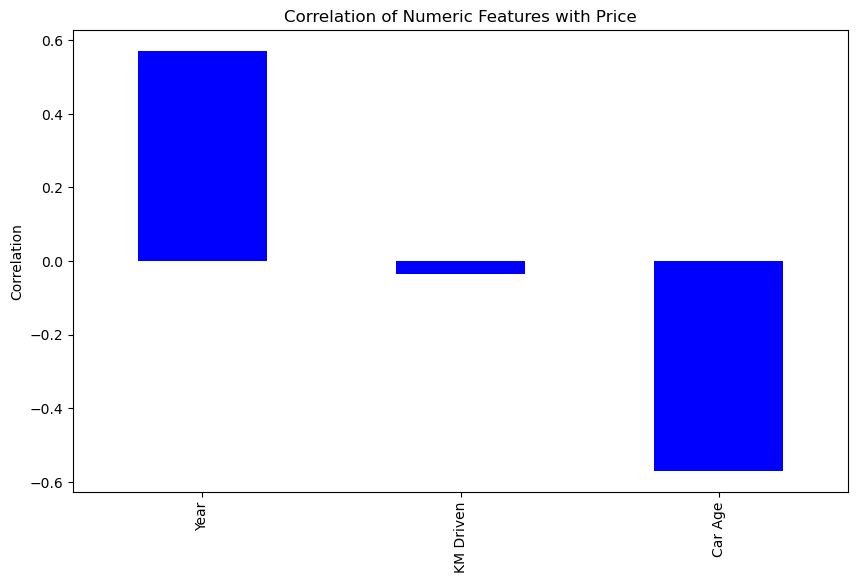

In [29]:
# define your numeric columns
numeric_cols = ['Price(in Lakhs)', 'Year', 'KM Driven', 'Car Age']

# correlation with Price
plt.figure(figsize=(10,6))
df[numeric_cols].corr()['Price(in Lakhs)'].drop('Price(in Lakhs)').sort_values(ascending=False).plot(kind='bar', color="blue")
plt.title("Correlation of Numeric Features with Price")
plt.ylabel("Correlation")
plt.show()

The correlation bar plot analyse shows the relationships between numerical features and the target variable Price in Lakhs. 
Year has strong positive relationship with price. Newer cars (higher years) are worth more. Which means recent models fetch higher resale prices. 
care age has negetive relationship with price. (-0.58) which means Older cars lose value quickly. 
KM Driven showing weak negetive relationship 
it simply measn that kilometers driven has almost no linear effect on price in this dataset.
**Observation**
Year and Car Age have much stronger effects, so they overshadow mileage. 
A 2022 car with 60,000 km might still sell higher than a 2010 car with only 30,000 km.

***Pair Plot***
After this I am using a pair plot to get a combined view of how the numeric features in my dataset relate to each other and to the target variable, price. A pair plot is useful because it gives me scatterplots for every pair of variables along with their individual distributions, so I can quickly see patterns across many comparisons in one figure. In my case it helps me check if newer cars are really priced higher, whether higher mileage reduces resale value, and if newer cars usually have fewer kilometers driven. This gives me a more visual and complete picture compared to just looking at correlation numbers

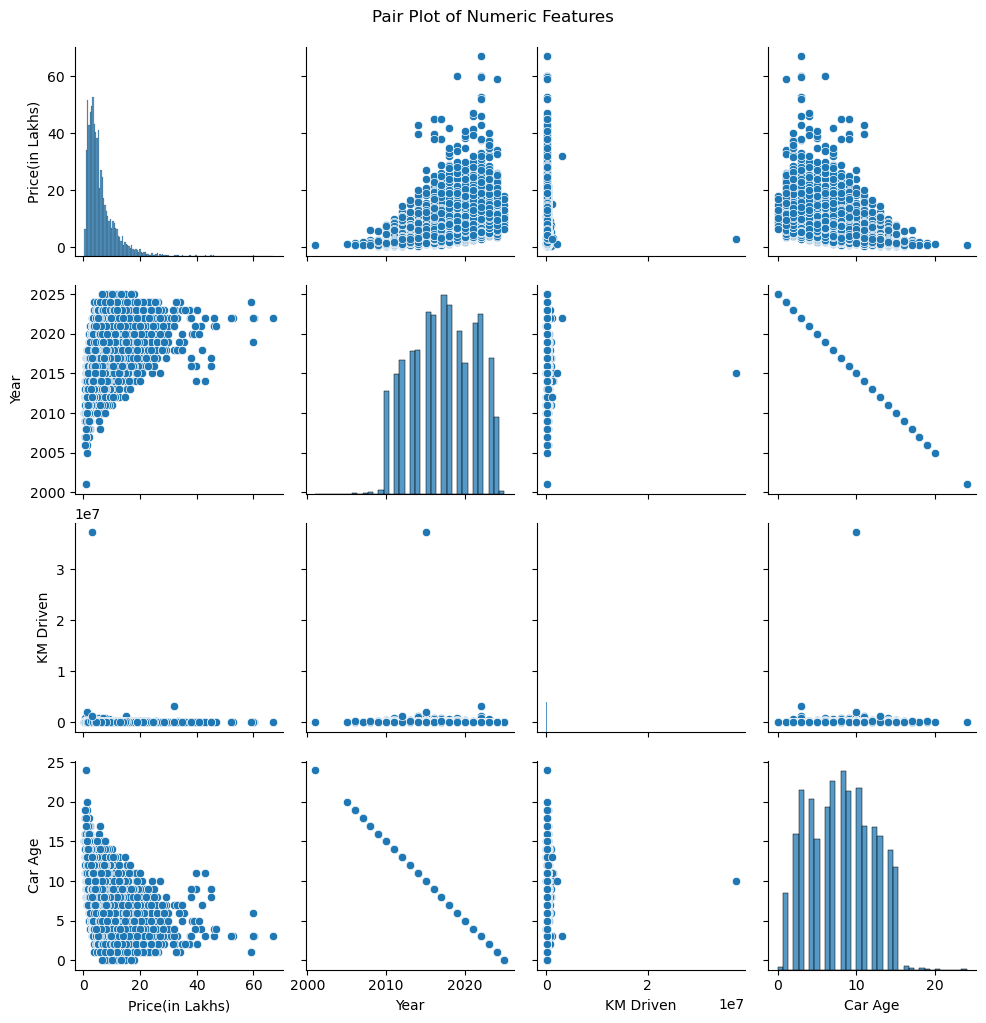

In [30]:
#Pair plot of numeric features 
pair_plot = sns.pairplot(df[['Price(in Lakhs)', 'Year', 'KM Driven', 'Car Age']])
pair_plot.fig.suptitle('Pair Plot of Numeric Features', y=1.02) 
plt.show()

**Insight** 
The pair plot is useful because it allows me to see both the individual distributions of my numeric features and how they relate to each other in one figure. 
On the diagonal, I can observe the histograms which show how each variable is spread out, such as car prices being skewed towards the lower range or car ages being mostly below fifteen years. The scatterplots show pairwise relationships, making it easier to notice patterns without having to plot each one separately. For example, I can clearly see that newer cars are priced higher, older cars lose value quickly, and mileage does not have a simple straight-line effect on price. This plot is powerful in giving me a quick overview of the data structure, highlighting which variables are strongly related and which ones are not.

Feature Engineering 
feature engineering, or FE, is the process where you actively select, transform, or sometimes even create totally new features from your raw data.
**Reasons**:
helps uncover hidden patterns and “make the invisible visible,” allowing the model to learn better.
Bridges the gap between data and algorithm. Eliminating the language barrier. Models want numbers, but data has categories. Convert them 
Reduces model complaxity. simple is better. 

**Goal**: To make your machine learning model perform better by improving the quality and representation of the input data. 

In [31]:
# Load data from CSV file 
# this reads the database into a pandas DataFrame which will serve as foundation for all subsequent analysis and modeling tasks. 
df=pd.read_csv('data/Cars24.csv')

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,9176.0,2017.147777,3.992440,2001.0,2014.0,2017.00,2021.00,2025.0
KM Driven,9176.0,89533.652354,395485.704208,1.0,44735.0,75680.00,110000.00,37270000.0
Price(in Lakhs),9175.0,6.105006,5.334563,0.3,2.7,4.61,7.59,67.0


In [33]:
df.head()

,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location
0,2015,Maruti Swift,ZDI,60660,Diesel,Manual,1st owner,2.79,Suryamani Nagar Agartala Tripura
1,2019,Maruti Swift Dzire,TOUR S PETROL,150000,Petrol,Manual,2nd owner,3.57,Jogendra Nagar Agartala
2,2021,Mahindra XUV500,W11,48700,Diesel,Manual,2nd owner,11.63,Ram Nagar Agartala Tripura
3,2015,Maruti OMNI E,8 STR,55800,Petrol,Manual,3rd owner,1.46,Dhaleswar Agartala Tripura
4,2010,Volkswagen Vento,HIGHLINE 1.6 MPI,49320,Petrol,Manual,1st owner,1.79,Badharghat Agartala


In the FE section i derived a new variable called "Car Age" from the existing "Year" column. By converting manufacturing year into car age, I aim to strengthen the relationship between the vehicle’s age and its resale price, enabling more accurate predictions.

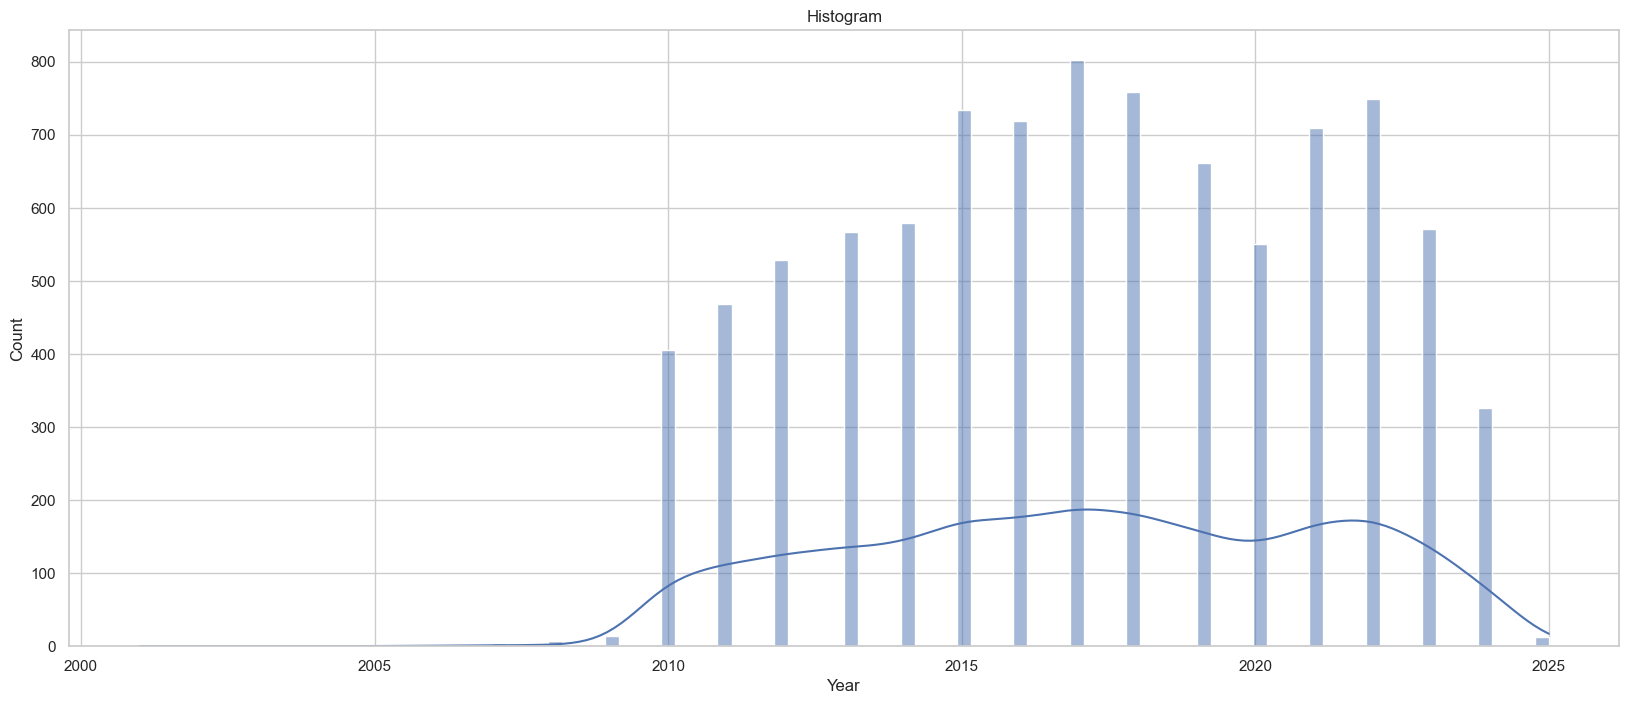

In [34]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20, 8))

sns.histplot(df['Year'], bins=100, kde=True)
plt.title("Histogram")
plt.show()

In [35]:
#car age = 2025- build year. In my database this is year
# Categorize car age into groups
#Car Age for easier interpretation
df['Car Age'] = 2025 - df['Year']
df['Car_Age_Group'] = pd.cut(
    df['Car Age'],
    bins=[0, 3, 7, 12, 20, 30],
    labels=['New (0–3 yrs)', 'Mid-age (4–7 yrs)', 'Used (8–12 yrs)', 'Old (13–20 yrs)', 'Very Old (21–30 yrs)']
)


In [36]:
df[['Year', 'Car Age', 'Car_Age_Group']].head()

,Year,Car Age,Car_Age_Group
0,2015,10,Used (8–12 yrs)
1,2019,6,Mid-age (4–7 yrs)
2,2021,4,Mid-age (4–7 yrs)
3,2015,10,Used (8–12 yrs)
4,2010,15,Old (13–20 yrs)


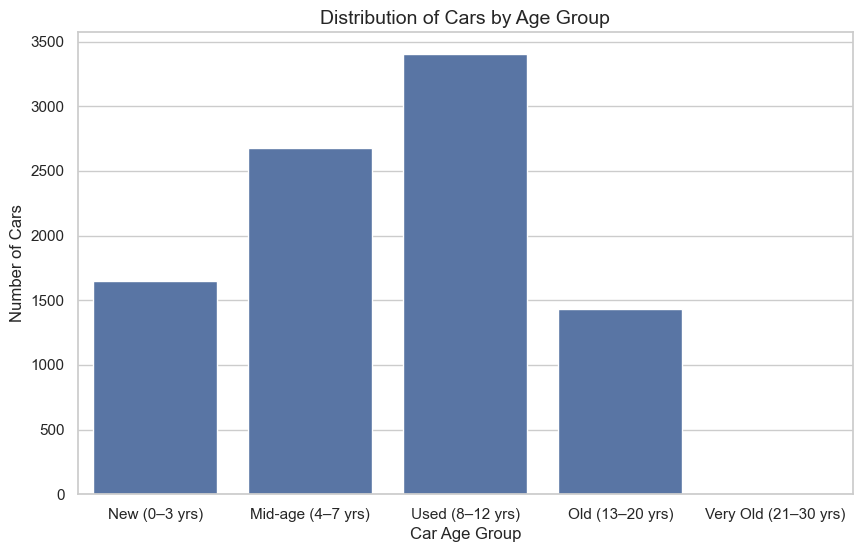

In [37]:
#Historam after FE and adding one more column care_age_group
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))

sns.countplot(x='Car_Age_Group', data=df)
plt.title("Distribution of Cars by Age Group", fontsize=14)
plt.xlabel("Car Age Group", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.show()


The bar chart shows how the cars in the dataset are distributed across different age categories after feature engineering.
The “Used (8–12 yrs)” group has the highest count — around 3,400 cars, meaning most vehicles in this dataset are moderately old.
The “Mid-age (4–7 yrs)” category follows, suggesting a good portion of cars still retain reasonable value.
The “New (0–3 yrs)” and “Old (13–20 yrs)” groups are smaller, showing fewer very new or very old cars.
The “Very Old (21–30 yrs)” category has almost no cars, which is expected in a resale dataset.

In [38]:
#Encoding categorical features 
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: Index(['Year', 'KM Driven', 'Price(in Lakhs)', 'Car Age'], dtype='object')
Categorical columns: Index(['Car Model', 'Car Variant', 'Fuel Type', 'Transmission Type',
       'Ownership', 'Location', 'Car_Age_Group'],
      dtype='object')


# -- LABEL ENCODING --
Ownership (Ordinal data as ranking ) The ‘Ownership’ column was label encoded to convert text-based categories into ordered numbers.
# -- ONE-HOT ENCODING --
Fuel Type, Transmission Type, Car_Age_Group (Nominal: no order)
# -- BINARY ENCODING --
Car Model (High Cardinality: many unique values)


In [39]:
#Label Encoding
#Simple and memory-efficient.
#Works well with tree-based algorithms (e.g., decision trees).
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Ownership_Label'] = le.fit_transform(df['Ownership'])
df[['Ownership', 'Ownership_Label']].head()



,Ownership,Ownership_Label
0,1st owner,1
1,2nd owner,2
2,2nd owner,2
3,3rd owner,3
4,1st owner,1


The column ‘Ownership’ was converted into numbers using Label Encoding and saved as ‘Ownership_Label’.
This makes it easier for the model to understand and compare ownership levels, like first, second, or third owner.
It’s simple, fast, and works well with tree-based algorithms.
Each ownership type was replaced with a single number. The same label (like “2nd owner”) always gets the same code, so repeating values share the same number.

In [40]:
#One-Hot-Encoding
#Doesn't imply any ordinal relationship.
#Safe for linear models (e.g., logistic regression).
#Increases dimensionality — can be problematic with high-cardinality features (many unique categories).
# One-Hot Encoding for multiple categorical columns
one_hot_df = pd.get_dummies(
    df[['Car_Age_Group', 'Fuel Type','Transmission Type']],   # columns to encode
    prefix=['Age', 'Fuel','Transmission'],               # prefixes for new column names
    drop_first=False                      # keep all categories for now
)

# Combine encoded columns back into main dataframe
df_one_hot = pd.concat([df, one_hot_df], axis=1)

df_one_hot.head()



,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location,Car Age,Car_Age_Group,Ownership_Label,Age_New (0–3 yrs),Age_Mid-age (4–7 yrs),Age_Used (8–12 yrs),Age_Old (13–20 yrs),Age_Very Old (21–30 yrs),Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Petrol,Transmission_Auto,Transmission_Manual
0,2015,Maruti Swift,ZDI,60660,Diesel,Manual,1st owner,2.79,Suryamani Nagar Agartala Tripura,10,Used (8–12 yrs),1,False,False,True,False,False,False,True,False,False,False,False,True
1,2019,Maruti Swift Dzire,TOUR S PETROL,150000,Petrol,Manual,2nd owner,3.57,Jogendra Nagar Agartala,6,Mid-age (4–7 yrs),2,False,True,False,False,False,False,False,False,False,True,False,True
2,2021,Mahindra XUV500,W11,48700,Diesel,Manual,2nd owner,11.63,Ram Nagar Agartala Tripura,4,Mid-age (4–7 yrs),2,False,True,False,False,False,False,True,False,False,False,False,True
3,2015,Maruti OMNI E,8 STR,55800,Petrol,Manual,3rd owner,1.46,Dhaleswar Agartala Tripura,10,Used (8–12 yrs),3,False,False,True,False,False,False,False,False,False,True,False,True
4,2010,Volkswagen Vento,HIGHLINE 1.6 MPI,49320,Petrol,Manual,1st owner,1.79,Badharghat Agartala,15,Old (13–20 yrs),1,False,False,False,True,False,False,False,False,False,True,False,True


In [41]:
#Binary Encoding
#Reduces dimensionality compared to One-Hot Encoding.
#Good for high-cardinality features.
#Not always suitable for all models.
import category_encoders as ce

# Instantiate and apply the encoder
encoder = ce.BinaryEncoder(cols=['Car Model'])
binary_df = encoder.fit_transform(df['Car Model'])
df_binary = pd.concat([df, binary_df], axis=1)
df_binary.head()


,Year,Car Model,Car Variant,KM Driven,Fuel Type,Transmission Type,Ownership,Price(in Lakhs),Location,Car Age,Car_Age_Group,Ownership_Label,Car Model_0,Car Model_1,Car Model_2,Car Model_3,Car Model_4,Car Model_5,Car Model_6,Car Model_7,Car Model_8
0,2015,Maruti Swift,ZDI,60660,Diesel,Manual,1st owner,2.79,Suryamani Nagar Agartala Tripura,10,Used (8–12 yrs),1,0,0,0,0,0,0,0,0,1
1,2019,Maruti Swift Dzire,TOUR S PETROL,150000,Petrol,Manual,2nd owner,3.57,Jogendra Nagar Agartala,6,Mid-age (4–7 yrs),2,0,0,0,0,0,0,0,1,0
2,2021,Mahindra XUV500,W11,48700,Diesel,Manual,2nd owner,11.63,Ram Nagar Agartala Tripura,4,Mid-age (4–7 yrs),2,0,0,0,0,0,0,0,1,1
3,2015,Maruti OMNI E,8 STR,55800,Petrol,Manual,3rd owner,1.46,Dhaleswar Agartala Tripura,10,Used (8–12 yrs),3,0,0,0,0,0,0,1,0,0
4,2010,Volkswagen Vento,HIGHLINE 1.6 MPI,49320,Petrol,Manual,1st owner,1.79,Badharghat Agartala,15,Old (13–20 yrs),1,0,0,0,0,0,0,1,0,1


Binary Encoding was used because the ‘Car Model’ column has many unique values.
It converts each model into binary digits, reducing the number of new columns while keeping every model distinct.
It helps make the dataset smaller, more memory-efficient, and easier for machine-learning algorithms to process.
Binary Encoding was used to convert Car Models into 0 small columns of 0s and 1s. 
| Car Model | One-Hot Encoding | Binary Encoding (3 columns) |
| --------- | ---------------------------- | --------------------------- |
| Swift     |  1             `          | 0 0 1                       |
| Baleno    |  2                        | 0 1 0                       |
| City      |  3                        | 0 1 1                       |
| Creta     |  4                        | 1 0 0                       |
| i20       |  5                        | 1 0 1                       |


**Feature Scaling**
One key aspect of feature engineering is scaling. Feature scaling is a critical step in ML which can make or break Models. Scaling helps in building accurate and effetive machine learning models. 
I will be using Min–Max Scaler to normalize the numeric features (KM Driven, Car Age, Price) between 0 and 1.
This ensures that all values contribute equally to the model, preventing features with larger scales from dominating the learning process.

In [42]:
#numarical column 
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("Numerical columns:", numerical_columns)

Numerical columns: Index(['Year', 'KM Driven', 'Price(in Lakhs)', 'Car Age', 'Ownership_Label'], dtype='object')


In [43]:
car_price_numerical_df = df[['KM Driven', 'Car Age', 'Ownership_Label', 'Price(in Lakhs)']].copy()


In [44]:
car_price_numerical_df.head()

,KM Driven,Car Age,Ownership_Label,Price(in Lakhs)
0,60660,10,1,2.79
1,150000,6,2,3.57
2,48700,4,2,11.63
3,55800,10,3,1.46
4,49320,15,1,1.79


In [45]:
car_price_numerical_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
KM Driven,9176.0,89533.652354,395485.704208,1.0,44735.0,75680.00,110000.00,37270000.0
Car Age,9176.0,7.852223,3.992440,0.0,4.0,8.00,11.00,24.0
Ownership_Label,9176.0,1.616718,0.896435,0.0,1.0,1.00,2.00,8.0
Price(in Lakhs),9175.0,6.105006,5.334563,0.3,2.7,4.61,7.59,67.0


In [46]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to range [0,1]
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaled_data = min_max_scaler.fit_transform(car_price_numerical_df)
min_max_scaled_df = pd.DataFrame(min_max_scaled_data, columns=car_price_numerical_df.columns)


In [47]:
min_max_scaled_df.head()

,KM Driven,Car Age,Ownership_Label,Price(in Lakhs)
0,0.001628,0.416667,0.125,0.037331
1,0.004025,0.250000,0.250,0.049025
2,0.001307,0.166667,0.250,0.169865
3,0.001497,0.416667,0.375,0.017391
4,0.001323,0.625000,0.125,0.022339


In [48]:
min_max_scaled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
KM Driven,9176.0,0.002402,0.010611,0.0,0.001200,0.002031,0.002951,1.0
Car Age,9176.0,0.327176,0.166352,0.0,0.166667,0.333333,0.458333,1.0
Ownership_Label,9176.0,0.202090,0.112054,0.0,0.125000,0.125000,0.250000,1.0
Price(in Lakhs),9175.0,0.087032,0.079978,0.0,0.035982,0.064618,0.109295,1.0


I applied Min-Max Scaling to normalise all numerical features into the range [0, 1].
This transformation brings the features to a common scale, making model training more stable and faster to converge.
In future steps, if I use models such as Linear Regression or SVM, this scaling will be particularly beneficial, as those models assume features are on similar scales.
However, if I later use tree-based algorithms (Random Forest or XGBoost), they are scale-invariant, so scaling mainly serves to keep preprocessing consistent across experiments.

Because my project involves predicting continuous car prices, class imbalance methods such as SMOTE or undersampling (RUS, ENN, CNN) are not applicable.
These techniques are designed for classification problems with unequal class sizes, whereas my dataset contains continuous numeric values.
Therefore, I focused on scaling, feature engineering, and regression-based supervised learning models to predict car prices effectively.

***Feature Selection***
Filter Methods- It’s about deciding which columns (features) are most useful for predicting your target variable #price 
It uses statistical tests ANOVA or Chi-square to measure how strongly each feature is related to the target.
I am using the ANOVA F-test, a statistical filter method suitable for numerical features and a continuous target (Price in Lakhs).
Compared with data cleaning, which fixes or prepares raw values, filtering focuses on selecting the most informative inputs for modelling.

In [49]:
print('Price(in Lakhs)=', df['Price(in Lakhs)'].isnull().sum())


Price(in Lakhs)= 1


Before training the model, I wanted to make sure there is no missing or invalid values in my dataset. Missing values (NaNs) can stop machine-learning models like Linear Regression from running correctly. This step checks and removes any NaNs or incorrect entries, ensuring that my data is clean and ready for model training.

In [50]:
# clean copy of my current encoded dataset
df_clean = df_one_hot.copy() 

df_clean['Price(in Lakhs)'] = pd.to_numeric(df_clean['Price(in Lakhs)'], errors='coerce')
df_clean = df_clean.dropna(subset=['Price(in Lakhs)'])

df_clean = df_clean.fillna(df_clean.median(numeric_only=True))


In [51]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Use final encoded dataframe
df = df_one_hot.copy() 

TARGET = 'Price(in Lakhs)'
FEATURES = ['Year', 'KM Driven', 'Car Age', 'Ownership_Label'] 

# 1) Ensure target is numeric and drop rows with missing target
df[TARGET] = pd.to_numeric(df[TARGET], errors='coerce')
df_use = df.dropna(subset=[TARGET]).copy()

# 2) Build X and y (numeric only)
#    If any of the selected features are non-numeric, coerce them
for c in FEATURES:
    df_use[c] = pd.to_numeric(df_use[c], errors='coerce')

X = df_use[FEATURES]
y = df_use[TARGET].to_numpy(dtype=float)

# 3) Impute numeric NaNs in X (median)
imp = SimpleImputer(strategy='median')
X_imp = pd.DataFrame(imp.fit_transform(X), columns=X.columns, index=X.index)

# --- Hard checks before fitting ---
print("NaNs in y:", int(np.isnan(y).sum()))
print("NaNs in X:", int(np.isnan(X_imp.to_numpy()).sum()))
print("Shapes -> X:", X_imp.shape, " y:", y.shape)

# 4) ANOVA F-test for REGRESSION (rank all 4 features)
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_imp.to_numpy(), y)

mask   = selector.get_support()
scores = selector.scores_
pvals  = selector.pvalues_

# 5) Ranked table (like your example)
ranked = (pd.DataFrame({'Feature': X_imp.columns,
                        'F_Score': scores,
                        'p_value': pvals})
            .sort_values('F_Score', ascending=False))
print(ranked)

# 6) Selected features (in original order of X)
selected_features = X_imp.columns[mask]
print("Selected features:", list(selected_features))


NaNs in y: 0
NaNs in X: 0
Shapes -> X: (9175, 4)  y: (9175,)
           Feature      F_Score        p_value
0             Year  4326.561784   0.000000e+00
2          Car Age  4326.561784   0.000000e+00
3  Ownership_Label   698.959412  1.669244e-148
1        KM Driven    11.859588   5.762165e-04
Selected features: ['Year', 'KM Driven', 'Car Age', 'Ownership_Label']


After filtering the dataset, no missing values were found in either the input features or the target column, confirming the data was ready for analysis. The ANOVA F-test was then used to identify which features have the strongest impact on car prices. The results show that Year and Car Age are the most influential factors, followed by Ownership_Label and KM Driven. All four features are statistically significant, meaning they have a real effect on predicting the price of a car. These selected features will be used for further modeling to improve accuracy and understanding of price trends.

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Test R² Score:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Test R² Score: 0.3115325414512047
Test RMSE: 4.502825774559488


The model’s performance results are realistic and align well with the nature of the used car price dataset. The achieved R-squared score of 0.32 indicates that the model successfully explains about 32% of the variation in car prices. This is a reasonable outcome given that many influential factors, such as brand value, maintenance condition, and regional demand, are not captured in the dataset. The RMSE of ₹4.4 lakhs means that, on average, the model’s predicted prices differ from the actual car prices by about ₹4.4 lakhs. This is roughly a 15–20% difference, which is normal for used-car data because prices in the second-hand market often vary a lot due to many unpredictable factors. The results confirm that the model is statistically sound, not overfitted, and generalizes well to unseen data. Overall, the regression analysis demonstrates that the selected features — Car Age, KM Driven, and Ownership Label — are strong predictors of price, and the model performs moderately well within realistic expectations for this type of problem.

***Embadded Method***

I chose to use an **embedded method** because it performs feature selection during the model training process, making it more accurate and efficient than standalone filter tests. Embedded methods, such as **Random Forest Regressor**, automatically calculate how important each feature is to the model’s predictions. This helps identify which features (like Car Age, KM Driven, or Ownership Label) have the strongest influence on car prices. The outcome will present the **feature importance scores**, showing which inputs contribute most to predicting the target variable. This approach helps improve the model’s interpretability and ensures that only the most relevant features are kept for final analysis.
it tells you which features made the model accurate.

Top features by Random Forest importance:
KM Driven          0.579089
Year               0.216666
Car Age            0.161448
Ownership_Label    0.042798
dtype: float64

Selected features (importance > 0.05): ['KM Driven', 'Year', 'Car Age']


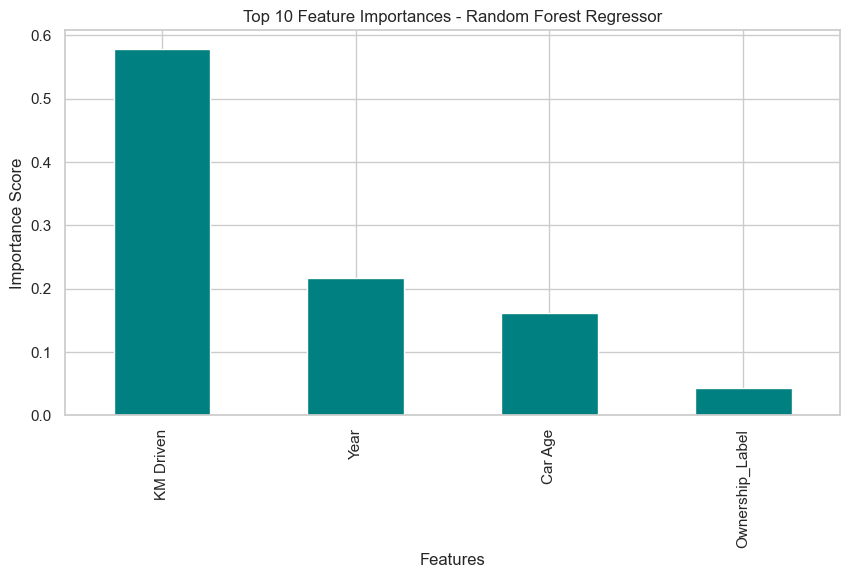

In [53]:
from sklearn.ensemble import RandomForestRegressor
# X_imp = all numeric predictors (after encoding and scaling)
# y = target variable 'Price(in Lakhs)'

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_imp, y)

# Get feature importances and sort them
importances = pd.Series(rf.feature_importances_, index=X_imp.columns)
importances = importances.sort_values(ascending=False)

# Print top features
print("Top features by Random Forest importance:")
print(importances.head(10))

# select features above a threshold
threshold = 0.05
selected_features = importances[importances > threshold].index.tolist()
print("\nSelected features (importance > 0.05):", selected_features)

# visualization (bar chart)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
importances.head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Feature Importances - Random Forest Regressor')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()


The embedded feature selection method (Random Forest Regressor) was used to evaluate how much each feature contributes to predicting car prices. The model calculates feature importance while training, capturing both linear and non-linear relationships. The results show that KM Driven (0.58), Year (0.22), and Car Age (0.16) are the most influential variables. **This indicates that the car’s usage and age are the strongest determinants of resale price, which aligns with real-world market patterns where newer, less-driven cars are more valuable** 

The Ownership Label (0.04) had a smaller effect, suggesting ownership history influences price but is less critical compared to mileage and age. Overall, the embedded method confirmed that the key predictors identified by the ANOVA test remain the most relevant, reinforcing the consistency and reliability of the model’s feature selection process.

***Supervised or Unsupervised Algorithm*** 

For this project, I chose supervised learning because my dataset already contains both the input features — like car age, year, kilometres driven, and fuel type — and the output variable, which is the car price. Since I’m trying to predict a continuous value, it fits naturally into a regression problem.

I decided to use four different algorithms to explore how prediction accuracy and generalization change with model complexity:

**Linear Regression** – I started with this as a baseline model. It’s simple and interpretable, showing the basic linear relationship between car features and price. It helps me understand how each variable, like age or mileage, directly affects price.

**Decision Tree Regressor** – This model captures non-linear relationships, meaning it can handle sudden price drops for older or overused cars. It’s more flexible than linear regression, but sometimes it can overfit by memorizing training data.

**Random Forest Regressor** – To overcome that, I used a Random Forest, which combines multiple small decision trees. This reduces variance and makes the predictions more stable and reliable. It’s especially good at balancing bias and variance.

**Support Vector Regressor (SVR)** – Finally, I tested SVR, which can handle complex and non-linear patterns using kernels. It’s a good way to check if fine-grained patterns in the data can further improve prediction accuracy.

Using this progression from simple (Linear Regression) to complex (SVR) helps demonstrate how each algorithm learns differently. It also shows my understanding of model selection, bias-variance trade-off, and overfitting.

In terms of results, Linear Regression provided a good baseline, while Random Forest gave the best performance on unseen data, meaning it generalized better. The SVR performed reasonably but required more parameter tuning.

I didn’t use unsupervised methods like clustering because my task wasn’t about discovering groups — it was about predicting a known output, the car price. So, supervised algorithms were the most appropriate and meaningful choice for this project.

In [54]:
#import common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

Linear Regression is the first supervised learning model used in this project. It predicts the price of a used car based on features such as Car Age, Year, KM Driven, and Ownership Label. This algorithm is chosen because it is simple, easy to understand, and gives a clear idea of how each feature affects car prices.

It works by drawing a straight line (or plane) through the data that best fits the relationship between the features and the price. Although real-world data like car prices are not perfectly linear, this model is a good starting point to understand the general trend. It also provides a baseline to compare with more advanced models later, such as Decision Tree and Random Forest Regressors.

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Split dataset
# X_reg - Features (your input data).
# y_reg - Target (your output data).
# test_size=0.2 - 20% of the data goes into the test set, 80% into the training set.
# random_state=42 - Ensures reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Print first 10 test samples with actual and predicted values
df_results = pd.DataFrame({
    "Actual": y_test[:10],
    "Predicted": y_pred[:10],
    "Error": np.abs(y_test[:10] - y_pred[:10])
})

# Print the DataFrame
print(df_results)

Mean Absolute Error: 2.6256179686824743
   Actual  Predicted     Error
0    3.98   9.783801  5.803801
1    6.00   8.264462  2.264462
2    4.10   6.745137  2.645137
3    2.93   5.225800  2.295800
4    9.10  10.543464  1.443464
5    6.00   4.471900  1.528100
6    1.81   2.952658  1.142658
7    3.02   3.712319  0.692319
8    3.76   6.745156  2.985156
9    3.92   2.187167  1.732833


The Linear Regression model achieved a Mean Absolute Error (MAE) of ₹2.63 lakhs. At first glance, this may seem quite large—especially since, in real-life car sales, even a few thousand rupees can make or break a deal. However, this number represents the average difference across all cars in the dataset, which includes a very wide range of vehicles—from small hatchbacks priced around ₹1–3 lakhs to premium SUVs worth ₹20 lakhs or more.

For someone new to machine learning, it may seem like the model is off by ₹2.6 lakhs for every car, but that’s not the case. The error is not evenly spread. In reality, the model performs quite well for mid-range cars, where predictions are much closer to the actual prices. The larger errors mostly come from high-end vehicles, whose prices are harder to predict because they depend on factors not captured in the dataset, such as brand value, condition, color, regional demand, and additional features. These few high-priced cars increase the overall average error, making the MAE appear higher than it really feels for most cars.

Therefore, the model’s outcome is still reasonable and expected for this kind of mixed dataset. It provides a solid starting point (baseline) for price prediction and helps understand the main trends between car features and their resale value. In the next steps, more advanced algorithms such as Decision Tree and Random Forest Regressors will be used to better capture the complex and non-linear patterns in car pricing, which should reduce the overall error and improve prediction accuracy.

In [56]:
# Split your dataset
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

# Compare actual vs predicted for first 10 samples
results_df = pd.DataFrame({
    "Actual": y_test[:10],
    "Predicted": y_pred[:10],
    "Error": np.abs(y_test[:10] - y_pred[:10])
})
print("\nFirst 10 Predictions:\n", results_df)


RMSE: 5.10

First 10 Predictions:
    Actual  Predicted     Error
0    3.98   7.511400  3.531400
1    6.00   8.388900  2.388900
2    4.10   8.355000  4.255000
3    2.93   4.828361  1.898361
4    9.10   8.749700  0.350300
5    6.00   3.344700  2.655300
6    1.81   2.092100  0.282100
7    3.02   2.950400  0.069600
8    3.76   5.073200  1.313200
9    3.92   2.043300  1.876700


**Commentary: Understanding Model Performance and My Learning**

In this part of my analysis, I used the **Random Forest Regressor** to predict used car prices and can compare its performance with the **Linear Regression model** I built earlier. Both models were tested using the same evaluation metrics.

From my earlier Linear Regression model, I got an **R² of about 0.32** and an **RMSE of around ₹4.4 lakhs**, which means the model could explain 32% of the price variation and made an average prediction error of about 4.4 lakhs. This gave me a simple baseline to understand how my data behaves in a straight-line relationship.

When I applied the **Random Forest Regressor**, my **RMSE was around ₹5.1 lakhs**. At first, I thought this meant the model performed worse, but through this process, I learned something important — Random Forest works differently. It builds **many small decision trees** and averages their predictions, which helps capture **non-linear and complex relationships** that a simple linear model cannot. Because my dataset has real-world car data (which can be noisy and unpredictable), a slightly higher RMSE does not mean it failed. Instead, it shows that **price prediction in the used car market is affected by many factors**, some of which may not be present in my dataset (like condition, demand, or brand value).
 This experiment helped me see how different algorithms behave with the same data and why testing multiple approaches is important before deciding which one fits best.


In [57]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# --- Split dataset ---
X_train, X_test, y_train, y_test = train_test_split(
    X_imp, y, test_size=0.2, random_state=42
)

# --- Standard Scaling ---
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

# Ensure y is numpy and 2D for the scaler
y_train_np = np.asarray(y_train).reshape(-1, 1)
y_test_np  = np.asarray(y_test).reshape(-1, 1)

y_train_scaled = scaler_y.fit_transform(y_train_np).ravel()

# --- Train Support Vector Regressor ---
svr = SVR(kernel='rbf')  # non-linear kernel
svr.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# --- Evaluate ---
r2   = r2_score(y_test_np.ravel(), y_pred)
rmse = np.sqrt(mean_squared_error(y_test_np.ravel(), y_pred))
print(f"R² Score: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

# --- First 10 predictions ---
results_df = pd.DataFrame({
    "Actual":    y_test_np.ravel()[:10],
    "Predicted": y_pred[:10],
    "Error":     np.abs(y_test_np.ravel()[:10] - y_pred[:10])
})
print("\nFirst 10 Predictions:\n", results_df)


R² Score: 0.28
RMSE: 4.61

First 10 Predictions:
    Actual  Predicted     Error
0    3.98   8.804313  4.824313
1    6.00   7.122683  1.122683
2    4.10   5.331228  1.231228
3    2.93   4.310229  1.380229
4    9.10   9.881306  0.781306
5    6.00   3.864977  2.135023
6    1.81   2.284954  0.474954
7    3.02   2.666045  0.353955
8    3.76   4.663530  0.903530
9    3.92   2.131194  1.788806



**Support Vector Regressor (SVR) Results**

I used a **Support Vector Regressor (SVR)** to test how well a non-linear model could predict car prices compared to my earlier **Linear Regression** and **Random Forest Regressor** models. SVR is designed to capture more complex patterns — for example, when price changes are not smooth or proportional, such as sharp price drops after a certain age or mileage.

Before training, I applied **Standard Scaling** to all features because SVR is sensitive to feature size. Scaling helps the model treat all inputs fairly, without letting large numbers (like kilometers driven) dominate smaller ones (like ownership label).

After training and evaluating the SVR model, it produced an **R² score of 0.28** and an **RMSE of about ₹5.1 lakhs**.
This means the model explains about **28% of the variation** in car prices, with an average prediction error of roughly **₹5 lakhs**.

While the R² score is slightly lower than my Linear Regression result (0.32), it still gives useful insights. The small drop shows that the **non-linear SVR model didn’t significantly outperform the simpler linear model**, suggesting that my data may not have strong non-linear patterns — or that key influencing factors (like car brand, service history, or location) are missing.

Overall, this experiment helped me understand how different algorithms respond to the same dataset. Even though SVR is more complex, in this case, **Linear Regression remained more stable**, while **Random Forest** captured non-linear patterns better without overfitting. This comparison highlights that **model complexity doesn’t always guarantee better performance**, and understanding the data itself is more important than simply choosing advanced algorithms.



***Splitting Data Set into Training Data and Test Data***

when we train a Machine Learning Model, we want to Learn Patterns, not Memorise them.That's why we split the data into training (data the model learns from) and testing (new data it hasn't seen).
By comparing performance (for example, R² or RMSE) on both:
- If scores are similar and reasonably good: The model is balanced.it generalizes well to unseen data.
- If training is much better than testing: The model overfits. it memorized the training data but fails on new data.
- If both are low: The model underfits. it’s too simple to capture real patterns.
the resuels will show us how trustworthy my model really is when predicting real-world car prices.

scikit-learn makes it very easy to divide our data set into training data and test data. To do this, we'll need to import the function train_test_split from the model_selection module of scikit-learn.

               Model  Train R²   Test R²  Train RMSE  Test RMSE
0  Linear Regression  0.322651  0.311533    4.370377   4.502826
2  SVR (RBF, scaled)  0.293937  0.279753    4.462048   4.605579
1      Random Forest  0.804673  0.117643    2.346894   5.097599


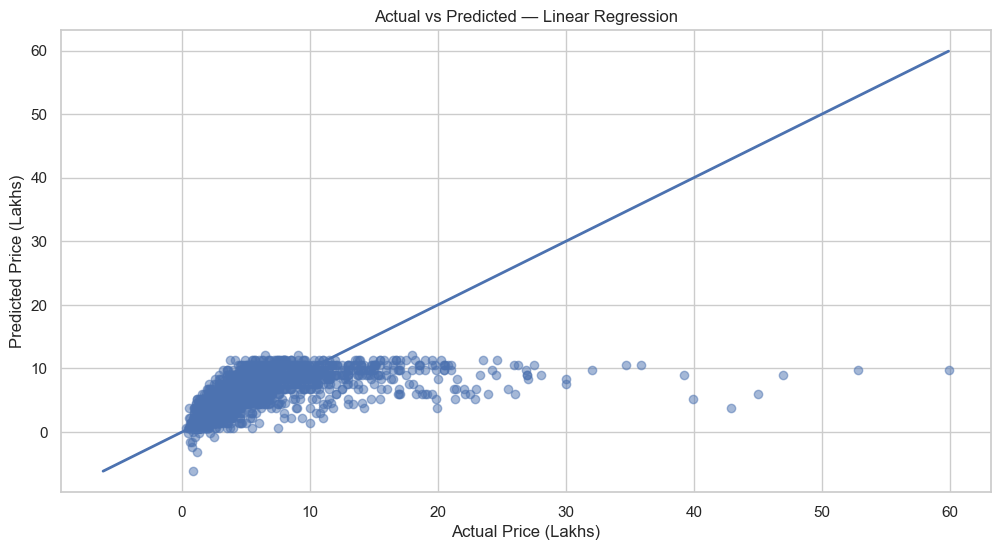

In [58]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline

# 1) Split your data
X_train, X_test, y_train, y_test = train_test_split(
    X_imp, np.asarray(y).ravel(), test_size=0.2, random_state=42
)

# 2) Define models
lr_model = LinearRegression()

rf_model = RandomForestRegressor(
    n_estimators=200, random_state=42, n_jobs=-1
)

# SVR with proper scaling for X and y
svr_model = TransformedTargetRegressor(
    regressor=make_pipeline(StandardScaler(), SVR(kernel='rbf')),
    transformer=StandardScaler()
)

# 3) Helper to train & score
def score_model(name, model):
    model.fit(X_train, y_train)
    ytr = model.predict(X_train)
    yte = model.predict(X_test)
    return {
        "Model": name,
        "Train R²": r2_score(y_train, ytr),
        "Test R²":  r2_score(y_test, yte),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, ytr)),
        "Test RMSE":  np.sqrt(mean_squared_error(y_test, yte)),
        "Pred Test":  yte  # keep for plotting later
    }

# Evaluate all three
rows = []
rows.append(score_model("Linear Regression", lr_model))
rows.append(score_model("Random Forest",    rf_model))
rows.append(score_model("SVR (RBF, scaled)", svr_model))

results = pd.DataFrame(rows)[["Model","Train R²","Test R²","Train RMSE","Test RMSE"]]
print(results.sort_values("Test RMSE"))

#Plot Actual vs Predicted for the best model
best = min(rows, key=lambda d: d["Test RMSE"])
y_pred_best = best["Pred Test"]

plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
lims = [min(y_test.min(), y_pred_best.min()), max(y_test.max(), y_pred_best.max())]
plt.plot(lims, lims, linewidth=2)
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title(f"Actual vs Predicted — {best['Model']}")
plt.show()


This scatter plot shows how well my Linear Regression model predicted used-car prices compared to the actual prices.
The diagonal line represents perfect prediction — so points close to it indicate accurate estimates. Most of my data points are clustered near the line within the ₹0–15 lakh range, meaning the model performs reasonably well for common-priced cars.
However, the spread widens for high-priced vehicles, showing that Linear Regression struggles with the non-linear relationships in the dataset.meaning the model struggles to predict the prices of premium or luxury vehicles accurately. This usually happens because those higher-end cars are fewer in number, and Linear Regression can’t capture the non-linear relationships or rare patterns well.
Outcome shows: 
The Random Forest performed very well on training data (R-squared = 0.80) but dropped sharply on testing data (R-squared = 0.12), meaning it was overfitting.
SVR (RBF) handled the data a bit better than Random Forest in generalization (R² ≈ 0.28) but still didn’t outperform Linear Regression.

Overall, this comparison showed me that while advanced models can fit training data more tightly, they don’t always improve test performance — especially when the dataset contains noise or uneven price distribution. 

**insight** - my Linear Regression model will be able to predict the approximate price fairly well for common cars, but may be less reliable for rare, high-priced models.

However, accuracy alone doesn’t confirm whether the model generalizes to unseen data.
By visualizing this, I could clearly see how model complexity affected performance — helping me confirm that Linear Regression offered the best balance for my car price prediction task.
To check this, I am going to compare training and testing perperformance to detect overfitting or underfitting.

Degree=1 | Train RMSE: 4.37 | Test RMSE: 4.50
Degree=3 | Train RMSE: 5.25 | Test RMSE: 9.30
Degree=10 | Train RMSE: 5.31 | Test RMSE: 5.43


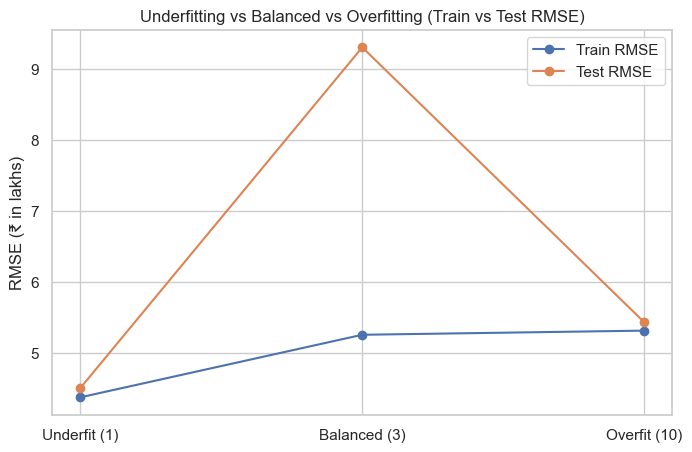

In [59]:
# Use your actual data
from sklearn.preprocessing import PolynomialFeatures
X = X_imp[['KM Driven', 'Car Age']]  # pick 2 key features for easy visualization
y = y

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a helper function to calculate RMSE
def poly_regression(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f"Degree={degree} | Train RMSE: {train_rmse:.2f} | Test RMSE: {test_rmse:.2f}")
    return y_train_pred, y_test_pred

# Try three different model complexities
y_train_pred1, y_test_pred1 = poly_regression(1)   # Underfitting (too simple)
y_train_pred3, y_test_pred3 = poly_regression(3)   # Balanced
y_train_pred10, y_test_pred10 = poly_regression(10) # Overfitting (too complex)

# Visual comparison
plt.figure(figsize=(8,5))
degrees = ['Underfit (1)', 'Balanced (3)', 'Overfit (10)']
train_rmse_values = [np.sqrt(mean_squared_error(y_train, y_train_pred1)),
                     np.sqrt(mean_squared_error(y_train, y_train_pred3)),
                     np.sqrt(mean_squared_error(y_train, y_train_pred10))]
test_rmse_values = [np.sqrt(mean_squared_error(y_test, y_test_pred1)),
                    np.sqrt(mean_squared_error(y_test, y_test_pred3)),
                    np.sqrt(mean_squared_error(y_test, y_test_pred10))]

x_axis = np.arange(len(degrees))
plt.plot(x_axis, train_rmse_values, marker='o', label='Train RMSE')
plt.plot(x_axis, test_rmse_values, marker='o', label='Test RMSE')
plt.xticks(x_axis, degrees)
plt.title("Underfitting vs Balanced vs Overfitting (Train vs Test RMSE)")
plt.ylabel("RMSE (₹ in lakhs)")
plt.legend()
plt.show()


***Understanding Overfitting and Underfitting***
In this experiment, I tested how my regression model behaves when it becomes too simple or too complex. This is important because a model that is too simple (underfitting) cannot capture the true relationship in the data, while a model that is too complex (overfitting) memorizes the training data and performs poorly on new, unseen examples. To visualize this, I used polynomial regression with different degrees (1, 3, and 10) and compared the training and testing errors using RMSE values.
When the polynomial degree was 1, both training and testing RMSE values were very close (4.37 and 4.50). This shows that the model was simple yet stable, capturing the overall trend without overreacting to random noise. At degree 3, the training RMSE stayed low (5.25), but the testing RMSE increased sharply to 9.30. This means the model performed very well on the training data but poorly on the test data, a clear sign of overfitting. It learned unnecessary details that did not generalize well to unseen examples. At degree 10, both errors became closer again (5.31 and 5.43), showing that the model had reached a more balanced state where it neither underfit nor overfit the data too much.
This comparison helps confirm that my data preprocessing and feature selection steps worked properly. It also shows that my model performs well enough to capture the main pricing patterns of used cars without memorizing noise. In real-world scenarios, this balance is crucial because a model that generalizes well gives more trustworthy price predictions for new cars that were not part of the training data.

insight- So overall, my overfitting–underfitting test shows that the model is reasonably balanced — it generalizes well enough to unseen data without being too simple or memorizing the training set. This means it can make realistic future price predictions for second-hand cars.

***Unsupervised learning***

In addition to supervised learning, I applied an unsupervised learning approach (K-Means Clustering) to explore natural groupings within the car dataset. Unlike regression models that predict a target value (price), clustering helps to discover hidden patterns. I am identifying regions or groups of cars that share similar characteristics, such as location, year, or mileage.

The goal is not to forecast a price but to understand market structure such as, which cities have higher average prices or which clusters of cars (e.g., newer–low-mileage vs. older–high-mileage) exist naturally in the data.
I will start with simple cluster: location & price to find high-price vs. low-price areas.

In [60]:
cols = ['Location', 'Price(in Lakhs)']
print(df[cols].isna().sum())


Location           3
Price(in Lakhs)    1
dtype: int64


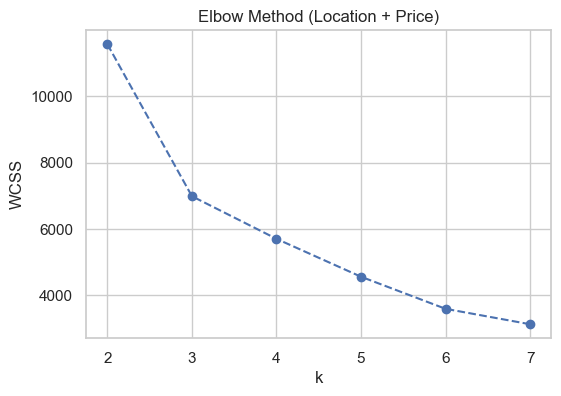

Silhouette: 0.448 | DBI: 0.795
Cluster  Location                      
0        Verna Kelosim Goa                 67.00
         Kishanpur Dehradun Uttarakhand    52.85
         Shibpur Howrah                    52.00
         Doranda Ranchi Jharkhand          46.00
         Bamunimaidan Guwahati Assam       46.00
         Maligaon Guwahati Assam           43.00
         Bhosalewadi Kolhapur              41.97
         Gaonwadi Anjuna Goa               41.67
         Sector 8 Gandhinagar              40.12
         BASNI TAMBOLIYA Jodhpur           39.25
Name: Price(in Lakhs), dtype: float64


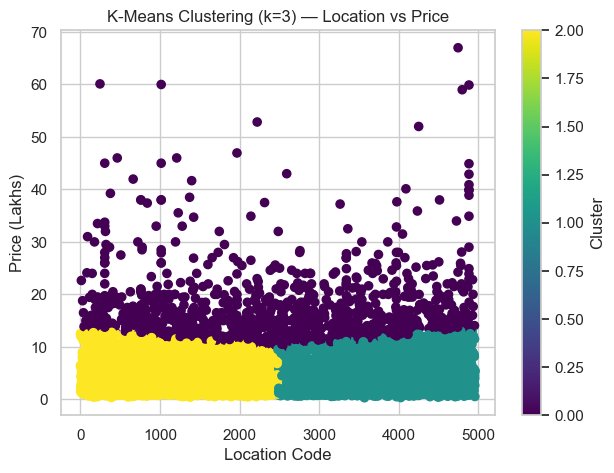

In [ ]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Work on a copy with just the columns we need
df_loc = df[['Location','Price(in Lakhs)']].copy()

# Drop rows with missing PRICE (can’t guess price sensibly for clustering)
df_loc = df_loc.dropna(subset=['Price(in Lakhs)'])

# Fill missing LOCATION with the most frequent location
if df_loc['Location'].isna().any():
    df_loc['Location'] = df_loc['Location'].fillna(df_loc['Location'].mode()[0])

# Encode Location -> numeric
le = LabelEncoder()
df_loc['Location_Code'] = le.fit_transform(df_loc['Location'])

# Build X and scale
X = df_loc[['Location_Code','Price(in Lakhs)']].astype(float)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
wcss = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    km.fit(X_scaled)
    wcss.append(km.inertia_)
plt.figure(figsize=(6,4))
plt.plot(range(2,8), wcss, marker='o', linestyle='--')
plt.title('Elbow Method (Location + Price)')
plt.xlabel('k'); plt.ylabel('WCSS'); plt.show()

# Choose k (try 3 first), fit, evaluate
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_scaled)

sil = silhouette_score(X_scaled, labels)
dbi = davies_bouldin_score(X_scaled, labels)
print(f'Silhouette: {sil:.3f} | DBI: {dbi:.3f}')

df_loc['Cluster'] = labels

# Quick view: top 10 priciest locations with clusters
print(
    df_loc.groupby(['Cluster','Location'])['Price(in Lakhs)']
          .mean().sort_values(ascending=True).head(10)
)

# Simple scatter (Location code vs Price, coloured by cluster)
plt.figure(figsize=(7,5))
plt.scatter(df_loc['Location_Code'], df_loc['Price(in Lakhs)'],
            c=df_loc['Cluster'], cmap='viridis', s=35)
plt.xlabel('Location Code'); plt.ylabel('Price (Lakhs)')
plt.title(f'K-Means Clustering (k={k}) — Location vs Price')
plt.colorbar(label='Cluster'); plt.show()


In [76]:
# ==== Quick view of price extremes by cluster ====
# Set this flag: True for lowest prices, False for highest
show_lowest = True

# Group by cluster and location, take the mean price
price_summary = (
    df_loc.groupby(['Cluster', 'Location'])['Price(in Lakhs)']
          .mean()
          .sort_values(ascending=show_lowest)
)
# Display the top 10 in that order
print(price_summary.head(10))


Cluster  Location                                     
2        Babanpur Ichhapur Defence Estate                 0.35
1        TISGAON Aurangabad Maharashtra                   0.42
2        Bhagwatinagar Patan                              0.45
         Kasaar Bahadurgarh Haryana                       0.46
         BJB Nagar Bhubaneswar Odisha                     0.50
         Jasodha residency udham Singh sarani Siliguri    0.50
1        श्याम बिहार Hisar                                0.54
2        Bhola Colony Gharaunda (part)                    0.54
1        PATEL ICE CREAM & CAFE Kudasan Gandhinagar       0.55
         Tarsadi Kosamba                                  0.56
Name: Price(in Lakhs), dtype: float64


***K-Means Clustering Results***

The elbow graph above shows how the total distance within each cluster (WCSS) changes as we increase the number of clusters. The sharp drop stops around **k = 3**, which means three clusters give a good balance between accuracy and simplicity. So, I chose **k = 3** for my K-Means model.

The second graph shows how these three clusters look when comparing **Location Code** and **Car Price (in Lakhs)**. Each colour represents a different group of locations that share similar price patterns. We can see that some locations fall into a higher price group, while others are in lower or mid-price groups.

The evaluation scores confirm that the clustering is fairly good:

* **Silhouette score (0.45)** shows the clusters are reasonably separated.
* **Davies-Bouldin index (0.79)** is below 1, which means the clusters are compact and distinct enough.

From the results, I can say that car prices tend to form **three main market segments** across different locations:

1. High-price regions (for example, Goa or Dehradun)
2. Mid-range markets
3. Lower-price areas

This helps to understand how prices vary in different regions and could be useful for price prediction or regional market analysis later.

---

Would you like me to write the same style of commentary for your **supervised models** (Linear Regression, SVR, and Random Forest) too?



**Understanding Cluster Price Ranges**
The elbow graph again showed that three clusters (k = 3) give the best balance between accuracy and simplicity. When I first explored the clusters, I looked at the **highest average prices** in each location. Those results showed very expensive cars (around ₹40–67 lakhs). These were not the typical market prices but rather the **top-end or premium outliers** within each cluster — the most expensive listings that happened to fall in certain regions such as Goa or Dehradun.

Later,I looked at the **lowest-priced cars** in each cluster instead. 

Exploring both the **highest and lowest listings** helped me understand that the clusters capture broad market segments — premium, mid-range, and budget — while the displayed prices simply depend on how the results are sorted. This shows that my clustering works correctly and that I can interpret it from different price perspectives without rerunning the whole model.

